In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import math 
import sklearn
import matplotlib.dates as mdates

pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
train=pd.read_csv("development_dataset.csv")
test=pd.read_csv("leaderboard_dataset.csv")
test1=pd.read_csv("Evaluation_dataset.csv")
new = train.append(test, ignore_index=True,sort=False)
data = new.append(test1, ignore_index=True,sort=False)
train.shape,test.shape,data.shape

((34000, 21), (10000, 20), (54000, 21))

In [3]:
data.VAR14=data.VAR14.replace({'.': None})
data.VAR14 = data.VAR14.astype(float)

In [4]:
# data['abnew1']=data['VAR3']*data['VAR12']
# data['abnew2']=data['VAR4']/data['VAR12']
# data['abnew3']=data['VAR3']/data['VAR16']

# data['new1']=data['VAR3']-data['VAR6']
# data['new5']=data['VAR2']/data['VAR4']
# data['new6']=data['VAR2']/data['VAR20']
# data['new7']=data['VAR4']*data['VAR20']

In [5]:
#data.replace([np.inf, -np.inf], np.nan,inplace=True)
data1=data.copy()
del data['VAR1']
data['VAR10'].fillna(method='ffill', inplace=True)
del data['VAR21']

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_cols = list(data)
data = pd.DataFrame(IterativeImputer(random_state=1,max_iter=200, sample_posterior=True,verbose=2,min_value=0.0).fit_transform(data))
data.columns = data_cols


data.head()

[IterativeImputer] Completing matrix with shape (54000, 19)
[IterativeImputer] Ending imputation round 1/200, elapsed time 1.20
[IterativeImputer] Ending imputation round 2/200, elapsed time 2.38
[IterativeImputer] Ending imputation round 3/200, elapsed time 3.53
[IterativeImputer] Ending imputation round 4/200, elapsed time 4.70
[IterativeImputer] Ending imputation round 5/200, elapsed time 5.87
[IterativeImputer] Ending imputation round 6/200, elapsed time 7.03
[IterativeImputer] Ending imputation round 7/200, elapsed time 8.23
[IterativeImputer] Ending imputation round 8/200, elapsed time 9.40
[IterativeImputer] Ending imputation round 9/200, elapsed time 11.04
[IterativeImputer] Ending imputation round 10/200, elapsed time 12.36
[IterativeImputer] Ending imputation round 11/200, elapsed time 13.53
[IterativeImputer] Ending imputation round 12/200, elapsed time 14.72
[IterativeImputer] Ending imputation round 13/200, elapsed time 15.90
[IterativeImputer] Ending imputation round 14/2

[IterativeImputer] Ending imputation round 117/200, elapsed time 157.65
[IterativeImputer] Ending imputation round 118/200, elapsed time 158.90
[IterativeImputer] Ending imputation round 119/200, elapsed time 160.12
[IterativeImputer] Ending imputation round 120/200, elapsed time 161.28
[IterativeImputer] Ending imputation round 121/200, elapsed time 162.71
[IterativeImputer] Ending imputation round 122/200, elapsed time 164.17
[IterativeImputer] Ending imputation round 123/200, elapsed time 165.57
[IterativeImputer] Ending imputation round 124/200, elapsed time 166.75
[IterativeImputer] Ending imputation round 125/200, elapsed time 167.93
[IterativeImputer] Ending imputation round 126/200, elapsed time 169.09
[IterativeImputer] Ending imputation round 127/200, elapsed time 170.26
[IterativeImputer] Ending imputation round 128/200, elapsed time 171.39
[IterativeImputer] Ending imputation round 129/200, elapsed time 172.55
[IterativeImputer] Ending imputation round 130/200, elapsed time

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
0,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,173.335406,58.632548,0.279273,100.083403,1.000000,1.000000,1.000000,1.540594,1004.295776,1.0,0.0,100.104991
1,911.764706,0.027778,176.819757,611.574748,8.181818,1.344479,198.600020,22.086661,58.632548,8.875429,15.012510,20.607178,1.000000,13.986786,1.614613,855.598751,0.0,1.0,146.654045
2,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,109.597061,58.632548,0.453212,210.175146,10.000000,1.000000,10.000000,1.044599,1241.340148,0.0,0.0,98.249570
3,892.941177,13.729632,688.774621,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,3.494681,297.880764,19.795299,1.000000,14.685211,1.145729,987.156386,1.0,0.0,140.862306
4,914.117647,0.083333,209.276682,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,9.692744,210.175146,16.367275,1.058409,29.658674,1.558341,806.882172,1.0,0.0,101.268503


In [6]:
features = data.columns.values[:]

for feature in features:
    temp = data[feature].value_counts(dropna=True)

    data[feature + 'vc'] = data[feature].map(temp).map(lambda x: min(10, x)).astype(np.uint8)

    data[feature + 'sum'] = ((data[feature] - data[feature].mean()) * data[feature + 'vc'].map(lambda x: int(x > 1))).astype(np.float32)
    
    data[feature + 'sum2'] = ((data[feature]) * data[feature + 'vc'].map(lambda x: int(x > 2))).astype(np.float32)

    data[feature + 'sum3'] = ((data[feature]) * data[feature + 'vc'].map(lambda x: int(x > 4))).astype(np.float32) 
    
print('Data set shape after creating magic features: {}'.format(data.shape))

Data set shape after creating magic features: (54000, 95)


In [10]:
data['VAR21']=data1['VAR21']
train_x=data[~data['VAR21'].isnull()]
train_x['VAR21'] = train_x['VAR21'].replace({'Low':0, 'Medium':1, 'High':2})
train_x.VAR21 = train_x.VAR21.astype(int)
train_y=train_x['VAR21']
lead_eval=data[data['VAR21'].isnull()]
sh=test.shape[0]
test_x1=lead_eval.iloc[:sh,:]
test_x2=lead_eval.iloc[sh:,:]

del train_x['VAR21']
del test_x1['VAR21']
del test_x2['VAR21']

In [34]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)
def my_custom_score(y_valid, predxgb):
    c = confusion_matrix(y_valid, predxgb)
    result = (1000*(c[0,0]+c[1,1]+c[2,2])) - (100*(c[0,1]+c[1,2]+c[2,0])) -(200*c[0,2]) -(50*(c[1,0]+c[2,1]))

    return result

In [44]:
%%time
import xgboost
from xgboost import XGBClassifier

modelxgb = XGBClassifier(
                         n_jobs=-1,
                         n_thread=-1,
                        colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.8,
                        gamma=5,learning_rate=0.01, max_delta_step=0, max_depth=12,
                        min_child_weight=12, n_estimators=650,objective='multi:softmax',
                        reg_alpha=0, reg_lambda=3.5, scale_pos_weight=1,subsample=1, verbosity=1
                        )
modelxgb.fit(X_train, y_train)
predxgb = modelxgb.predict(X_valid)
print(my_custom_score(y_valid,predxgb))



# modelxgb.fit(train_x, train_y)
# predxgb1 = modelxgb.predict(test_x1)
# predxgb2 = modelxgb.predict(test_x2)

3737150
Wall time: 3min 55s


In [ ]:
3765000, 12, 3.5

In [42]:
from xgboost import XGBClassifier

modelxgb=XGBClassifier(n_estimators=3000,n_jobs=-1,
                         n_thread=-1,
                        colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.8,
                        gamma=5,learning_rate=0.01, max_delta_step=0, max_depth=12,
                        min_child_weight=1, objective='multi:softmax', random_state=1,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1,subsample=1, verbosity=1)
modelxgb.fit(X_train, y_train,eval_set=[(X_valid, y_valid)], early_stopping_rounds=300,verbose=200)

[0]	validation_0-merror:0.450294
Will train until validation_0-merror hasn't improved in 300 rounds.
[100]	validation_0-merror:0.419706
[200]	validation_0-merror:0.417941
[300]	validation_0-merror:0.415882
[400]	validation_0-merror:0.414118
[500]	validation_0-merror:0.412941
[600]	validation_0-merror:0.4125
[700]	validation_0-merror:0.412353
[800]	validation_0-merror:0.411912
[900]	validation_0-merror:0.411324
[1000]	validation_0-merror:0.4125
[1100]	validation_0-merror:0.412941
[1200]	validation_0-merror:0.413824
Stopping. Best iteration:
[900]	validation_0-merror:0.411324



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5,
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=3000, n_jobs=-1,
              n_thread=-1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [23]:
%%time
import xgboost
from xgboost import XGBClassifier

modelxgb = XGBClassifier(
                         n_jobs=-1,
                         n_thread=-1,
                        colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.8,
                        gamma=5,learning_rate=0.01, max_delta_step=0, max_depth=12,
                        min_child_weight=1, n_estimators=781,objective='multi:softmax', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1,subsample=1, verbosity=1
                        )
# modelxgb.fit(X_train, y_train)
# predxgb = modelxgb.predict(X_valid)
# print(my_custom_score(y_valid,predxgb))



modelxgb.fit(train_x, train_y)
predxgb1 = modelxgb.predict(test_x1)
predxgb2 = modelxgb.predict(test_x2)

Wall time: 6min 13s


In [144]:
from sklearn.ensemble import AdaBoostClassifier

modelada=AdaBoostClassifier(n_estimators=3000,random_state=1994,learning_rate=0.1)
modellgb.fit(X_train, y_train,eval_set=[(X_valid, y_valid)], early_stopping_rounds=200,verbose=200)

Training until validation scores don't improve for 200 rounds
[200]	valid_0's multi_logloss: 0.864557
[400]	valid_0's multi_logloss: 0.856767
Did not meet early stopping. Best iteration is:
[567]	valid_0's multi_logloss: 0.854723


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
               importance_type='split', learning_rate=0.03, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=567, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1994, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [24]:
from sklearn.ensemble import AdaBoostClassifier

modelada = AdaBoostClassifier(random_state=1994,n_estimators=567,learning_rate=0.1)
modelada.fit(X_train,y_train)
predada=modelada.predict(X_valid)
my_custom_score(y_valid,predada)

3662700

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier(learning_rate=.15, random_state=1)
modelgb.fit(X_train,y_train)
predgb=modelgb.predict(X_valid)
my_custom_score(y_valid,predgb)

3768150

In [140]:
import lightgbm

modellgb=lightgbm.LGBMClassifier(n_estimators=3000,random_state=1994,learning_rate=0.03,colsample_bytree=0.2,scale_pos_weight=1)
modellgb.fit(X_train, y_train,eval_set=[(X_valid, y_valid)], early_stopping_rounds=200,verbose=200)

Training until validation scores don't improve for 200 rounds
[200]	valid_0's multi_logloss: 0.864557
[400]	valid_0's multi_logloss: 0.856767
[600]	valid_0's multi_logloss: 0.855093
Early stopping, best iteration is:
[567]	valid_0's multi_logloss: 0.854723


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
               importance_type='split', learning_rate=0.03, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=3000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1994, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [26]:
import lightgbm 
modellgb=lightgbm.LGBMClassifier(n_estimators=567,random_state=1994,learning_rate=0.03,colsample_bytree=0.2,scale_pos_weight=1, n_jobs=-1)
modellgb.fit(X_train,y_train)
predlgb=modellgb.predict(X_valid)
my_custom_score(y_valid,predlgb)

3761350

In [137]:
import catboost
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

modelcb=catboost.CatBoostClassifier(n_estimators=2500,random_state=1994,learning_rate=0.03,loss_function='MultiClass')
modelcb.fit(X_train, y_train,eval_set=[(X_valid, y_valid)], early_stopping_rounds=200,verbose=200,cat_features=categorical_features_indices)

0:	learn: 1.0892022	test: 1.0891392	best: 1.0891392 (0)	total: 150ms	remaining: 6m 14s
200:	learn: 0.8713445	test: 0.8776626	best: 0.8776626 (200)	total: 29.4s	remaining: 5m 36s
400:	learn: 0.8531579	test: 0.8684334	best: 0.8684334 (400)	total: 58.2s	remaining: 5m 4s
600:	learn: 0.8393241	test: 0.8642108	best: 0.8642108 (600)	total: 1m 28s	remaining: 4m 40s
800:	learn: 0.8274459	test: 0.8617804	best: 0.8617804 (800)	total: 1m 59s	remaining: 4m 13s
1000:	learn: 0.8166328	test: 0.8599048	best: 0.8598837 (993)	total: 2m 29s	remaining: 3m 44s
1200:	learn: 0.8070534	test: 0.8587271	best: 0.8586620 (1193)	total: 3m 1s	remaining: 3m 16s
1400:	learn: 0.7972786	test: 0.8577003	best: 0.8576444 (1364)	total: 3m 31s	remaining: 2m 46s
1600:	learn: 0.7881900	test: 0.8566202	best: 0.8566202 (1600)	total: 4m 2s	remaining: 2m 15s
1800:	learn: 0.7803180	test: 0.8567621	best: 0.8566105 (1608)	total: 4m 33s	remaining: 1m 45s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8566104608
b

In [27]:
import catboost

modelcb = catboost.CatBoostClassifier(iterations=1609,
                                    learning_rate=0.03,
                                    random_seed=1994,
                                    loss_function='MultiClass')
modelcb.fit(X_train,y_train)
predcb=modelcb.predict(X_valid)
my_custom_score(y_valid,predcb)

0:	learn: 1.0892022	total: 703ms	remaining: 18m 50s
1:	learn: 1.0805340	total: 1.37s	remaining: 18m 18s
2:	learn: 1.0720856	total: 2.01s	remaining: 17m 56s
3:	learn: 1.0641163	total: 2.64s	remaining: 17m 37s
4:	learn: 1.0564220	total: 3.28s	remaining: 17m 32s
5:	learn: 1.0495711	total: 3.9s	remaining: 17m 23s
6:	learn: 1.0427587	total: 4.52s	remaining: 17m 13s
7:	learn: 1.0360683	total: 5.14s	remaining: 17m 8s
8:	learn: 1.0299950	total: 5.77s	remaining: 17m 5s
9:	learn: 1.0241928	total: 6.4s	remaining: 17m 3s
10:	learn: 1.0186810	total: 7.07s	remaining: 17m 6s
11:	learn: 1.0131808	total: 7.71s	remaining: 17m 5s
12:	learn: 1.0083353	total: 8.33s	remaining: 17m 2s
13:	learn: 1.0040241	total: 8.95s	remaining: 16m 59s
14:	learn: 0.9991623	total: 9.58s	remaining: 16m 58s
15:	learn: 0.9950044	total: 10.2s	remaining: 16m 56s
16:	learn: 0.9907101	total: 10.8s	remaining: 16m 54s
17:	learn: 0.9868055	total: 11.5s	remaining: 16m 52s
18:	learn: 0.9831381	total: 12.1s	remaining: 16m 50s
19:	learn: 

155:	learn: 0.8773946	total: 1m 48s	remaining: 16m 49s
156:	learn: 0.8771976	total: 1m 49s	remaining: 16m 48s
157:	learn: 0.8770777	total: 1m 49s	remaining: 16m 47s
158:	learn: 0.8770010	total: 1m 50s	remaining: 16m 46s
159:	learn: 0.8768026	total: 1m 51s	remaining: 16m 46s
160:	learn: 0.8767071	total: 1m 51s	remaining: 16m 46s
161:	learn: 0.8766036	total: 1m 52s	remaining: 16m 46s
162:	learn: 0.8765112	total: 1m 53s	remaining: 16m 45s
163:	learn: 0.8763338	total: 1m 54s	remaining: 16m 44s
164:	learn: 0.8761596	total: 1m 54s	remaining: 16m 44s
165:	learn: 0.8758822	total: 1m 55s	remaining: 16m 43s
166:	learn: 0.8756966	total: 1m 56s	remaining: 16m 42s
167:	learn: 0.8754309	total: 1m 56s	remaining: 16m 41s
168:	learn: 0.8752892	total: 1m 57s	remaining: 16m 39s
169:	learn: 0.8751417	total: 1m 58s	remaining: 16m 39s
170:	learn: 0.8750217	total: 1m 58s	remaining: 16m 39s
171:	learn: 0.8748385	total: 1m 59s	remaining: 16m 38s
172:	learn: 0.8746692	total: 2m	remaining: 16m 40s
173:	learn: 0.

306:	learn: 0.8607227	total: 3m 32s	remaining: 15m 2s
307:	learn: 0.8606574	total: 3m 33s	remaining: 15m 1s
308:	learn: 0.8606053	total: 3m 34s	remaining: 15m
309:	learn: 0.8605653	total: 3m 34s	remaining: 14m 59s
310:	learn: 0.8605284	total: 3m 35s	remaining: 14m 59s
311:	learn: 0.8604882	total: 3m 36s	remaining: 14m 58s
312:	learn: 0.8604252	total: 3m 36s	remaining: 14m 58s
313:	learn: 0.8603119	total: 3m 37s	remaining: 14m 57s
314:	learn: 0.8602051	total: 3m 38s	remaining: 14m 56s
315:	learn: 0.8601753	total: 3m 38s	remaining: 14m 55s
316:	learn: 0.8601024	total: 3m 39s	remaining: 14m 54s
317:	learn: 0.8600342	total: 3m 40s	remaining: 14m 53s
318:	learn: 0.8599639	total: 3m 40s	remaining: 14m 52s
319:	learn: 0.8598509	total: 3m 41s	remaining: 14m 51s
320:	learn: 0.8597317	total: 3m 41s	remaining: 14m 50s
321:	learn: 0.8596851	total: 3m 42s	remaining: 14m 49s
322:	learn: 0.8596356	total: 3m 43s	remaining: 14m 49s
323:	learn: 0.8595211	total: 3m 43s	remaining: 14m 48s
324:	learn: 0.85

457:	learn: 0.8484795	total: 5m 14s	remaining: 13m 9s
458:	learn: 0.8484057	total: 5m 14s	remaining: 13m 8s
459:	learn: 0.8482997	total: 5m 15s	remaining: 13m 7s
460:	learn: 0.8482093	total: 5m 15s	remaining: 13m 6s
461:	learn: 0.8481522	total: 5m 16s	remaining: 13m 6s
462:	learn: 0.8480555	total: 5m 17s	remaining: 13m 5s
463:	learn: 0.8480087	total: 5m 17s	remaining: 13m 4s
464:	learn: 0.8479674	total: 5m 18s	remaining: 13m 3s
465:	learn: 0.8478506	total: 5m 19s	remaining: 13m 2s
466:	learn: 0.8477799	total: 5m 19s	remaining: 13m 2s
467:	learn: 0.8477315	total: 5m 20s	remaining: 13m 1s
468:	learn: 0.8477178	total: 5m 21s	remaining: 13m
469:	learn: 0.8476794	total: 5m 21s	remaining: 12m 59s
470:	learn: 0.8476090	total: 5m 22s	remaining: 12m 59s
471:	learn: 0.8475688	total: 5m 23s	remaining: 12m 58s
472:	learn: 0.8475307	total: 5m 24s	remaining: 12m 58s
473:	learn: 0.8474578	total: 5m 24s	remaining: 12m 57s
474:	learn: 0.8473910	total: 5m 25s	remaining: 12m 57s
475:	learn: 0.8472546	tot

608:	learn: 0.8389000	total: 7m 10s	remaining: 11m 46s
609:	learn: 0.8388238	total: 7m 11s	remaining: 11m 46s
610:	learn: 0.8387300	total: 7m 12s	remaining: 11m 46s
611:	learn: 0.8386728	total: 7m 13s	remaining: 11m 45s
612:	learn: 0.8386519	total: 7m 14s	remaining: 11m 45s
613:	learn: 0.8386268	total: 7m 15s	remaining: 11m 45s
614:	learn: 0.8385502	total: 7m 16s	remaining: 11m 44s
615:	learn: 0.8385266	total: 7m 17s	remaining: 11m 44s
616:	learn: 0.8385024	total: 7m 17s	remaining: 11m 44s
617:	learn: 0.8384392	total: 7m 18s	remaining: 11m 43s
618:	learn: 0.8383981	total: 7m 19s	remaining: 11m 43s
619:	learn: 0.8383371	total: 7m 20s	remaining: 11m 43s
620:	learn: 0.8382901	total: 7m 21s	remaining: 11m 42s
621:	learn: 0.8382166	total: 7m 22s	remaining: 11m 42s
622:	learn: 0.8381481	total: 7m 23s	remaining: 11m 41s
623:	learn: 0.8381127	total: 7m 24s	remaining: 11m 41s
624:	learn: 0.8380285	total: 7m 25s	remaining: 11m 41s
625:	learn: 0.8379797	total: 7m 26s	remaining: 11m 40s
626:	learn

758:	learn: 0.8301293	total: 8m 58s	remaining: 10m 3s
759:	learn: 0.8299945	total: 8m 59s	remaining: 10m 2s
760:	learn: 0.8299129	total: 9m	remaining: 10m 1s
761:	learn: 0.8298471	total: 9m	remaining: 10m
762:	learn: 0.8298053	total: 9m 1s	remaining: 10m
763:	learn: 0.8297489	total: 9m 1s	remaining: 9m 59s
764:	learn: 0.8297059	total: 9m 2s	remaining: 9m 58s
765:	learn: 0.8295801	total: 9m 3s	remaining: 9m 57s
766:	learn: 0.8295156	total: 9m 3s	remaining: 9m 56s
767:	learn: 0.8294395	total: 9m 4s	remaining: 9m 56s
768:	learn: 0.8293226	total: 9m 4s	remaining: 9m 55s
769:	learn: 0.8292547	total: 9m 5s	remaining: 9m 54s
770:	learn: 0.8291885	total: 9m 6s	remaining: 9m 53s
771:	learn: 0.8291267	total: 9m 7s	remaining: 9m 53s
772:	learn: 0.8290495	total: 9m 7s	remaining: 9m 52s
773:	learn: 0.8289932	total: 9m 8s	remaining: 9m 51s
774:	learn: 0.8289380	total: 9m 9s	remaining: 9m 50s
775:	learn: 0.8288714	total: 9m 9s	remaining: 9m 50s
776:	learn: 0.8288289	total: 9m 10s	remaining: 9m 49s
77

910:	learn: 0.8216287	total: 10m 37s	remaining: 8m 8s
911:	learn: 0.8215790	total: 10m 38s	remaining: 8m 8s
912:	learn: 0.8214922	total: 10m 39s	remaining: 8m 7s
913:	learn: 0.8214110	total: 10m 39s	remaining: 8m 6s
914:	learn: 0.8213739	total: 10m 40s	remaining: 8m 5s
915:	learn: 0.8213065	total: 10m 41s	remaining: 8m 5s
916:	learn: 0.8212707	total: 10m 41s	remaining: 8m 4s
917:	learn: 0.8212002	total: 10m 42s	remaining: 8m 3s
918:	learn: 0.8211677	total: 10m 43s	remaining: 8m 2s
919:	learn: 0.8211432	total: 10m 43s	remaining: 8m 2s
920:	learn: 0.8210496	total: 10m 44s	remaining: 8m 1s
921:	learn: 0.8210271	total: 10m 44s	remaining: 8m
922:	learn: 0.8209963	total: 10m 45s	remaining: 7m 59s
923:	learn: 0.8209406	total: 10m 46s	remaining: 7m 59s
924:	learn: 0.8208179	total: 10m 46s	remaining: 7m 58s
925:	learn: 0.8207921	total: 10m 47s	remaining: 7m 57s
926:	learn: 0.8207690	total: 10m 48s	remaining: 7m 56s
927:	learn: 0.8207307	total: 10m 48s	remaining: 7m 56s
928:	learn: 0.8206813	tot

1060:	learn: 0.8139830	total: 12m 16s	remaining: 6m 20s
1061:	learn: 0.8139450	total: 12m 16s	remaining: 6m 19s
1062:	learn: 0.8138959	total: 12m 17s	remaining: 6m 18s
1063:	learn: 0.8138059	total: 12m 18s	remaining: 6m 18s
1064:	learn: 0.8137441	total: 12m 18s	remaining: 6m 17s
1065:	learn: 0.8137076	total: 12m 19s	remaining: 6m 16s
1066:	learn: 0.8136935	total: 12m 20s	remaining: 6m 16s
1067:	learn: 0.8136688	total: 12m 20s	remaining: 6m 15s
1068:	learn: 0.8136008	total: 12m 21s	remaining: 6m 14s
1069:	learn: 0.8135762	total: 12m 22s	remaining: 6m 13s
1070:	learn: 0.8134871	total: 12m 22s	remaining: 6m 13s
1071:	learn: 0.8134744	total: 12m 23s	remaining: 6m 12s
1072:	learn: 0.8134440	total: 12m 24s	remaining: 6m 11s
1073:	learn: 0.8133479	total: 12m 24s	remaining: 6m 10s
1074:	learn: 0.8132811	total: 12m 25s	remaining: 6m 10s
1075:	learn: 0.8132453	total: 12m 26s	remaining: 6m 9s
1076:	learn: 0.8130654	total: 12m 26s	remaining: 6m 8s
1077:	learn: 0.8129809	total: 12m 27s	remaining: 6

1208:	learn: 0.8066881	total: 13m 57s	remaining: 4m 37s
1209:	learn: 0.8066264	total: 13m 58s	remaining: 4m 36s
1210:	learn: 0.8065748	total: 13m 58s	remaining: 4m 35s
1211:	learn: 0.8064580	total: 13m 59s	remaining: 4m 34s
1212:	learn: 0.8064064	total: 14m	remaining: 4m 34s
1213:	learn: 0.8063542	total: 14m	remaining: 4m 33s
1214:	learn: 0.8062753	total: 14m 1s	remaining: 4m 32s
1215:	learn: 0.8062234	total: 14m 2s	remaining: 4m 32s
1216:	learn: 0.8061914	total: 14m 2s	remaining: 4m 31s
1217:	learn: 0.8061346	total: 14m 3s	remaining: 4m 30s
1218:	learn: 0.8061038	total: 14m 4s	remaining: 4m 30s
1219:	learn: 0.8060465	total: 14m 4s	remaining: 4m 29s
1220:	learn: 0.8060065	total: 14m 5s	remaining: 4m 28s
1221:	learn: 0.8059809	total: 14m 6s	remaining: 4m 28s
1222:	learn: 0.8059460	total: 14m 7s	remaining: 4m 27s
1223:	learn: 0.8058659	total: 14m 7s	remaining: 4m 26s
1224:	learn: 0.8057542	total: 14m 8s	remaining: 4m 26s
1225:	learn: 0.8056501	total: 14m 9s	remaining: 4m 25s
1226:	learn:

1356:	learn: 0.7992516	total: 15m 36s	remaining: 2m 53s
1357:	learn: 0.7991734	total: 15m 37s	remaining: 2m 53s
1358:	learn: 0.7991588	total: 15m 38s	remaining: 2m 52s
1359:	learn: 0.7990109	total: 15m 38s	remaining: 2m 51s
1360:	learn: 0.7989503	total: 15m 39s	remaining: 2m 51s
1361:	learn: 0.7989260	total: 15m 40s	remaining: 2m 50s
1362:	learn: 0.7989121	total: 15m 40s	remaining: 2m 49s
1363:	learn: 0.7988811	total: 15m 41s	remaining: 2m 49s
1364:	learn: 0.7988635	total: 15m 42s	remaining: 2m 48s
1365:	learn: 0.7988191	total: 15m 42s	remaining: 2m 47s
1366:	learn: 0.7987994	total: 15m 43s	remaining: 2m 47s
1367:	learn: 0.7987413	total: 15m 43s	remaining: 2m 46s
1368:	learn: 0.7987121	total: 15m 44s	remaining: 2m 45s
1369:	learn: 0.7986352	total: 15m 45s	remaining: 2m 44s
1370:	learn: 0.7985492	total: 15m 45s	remaining: 2m 44s
1371:	learn: 0.7984998	total: 15m 46s	remaining: 2m 43s
1372:	learn: 0.7984126	total: 15m 47s	remaining: 2m 42s
1373:	learn: 0.7983608	total: 15m 48s	remaining:

1504:	learn: 0.7922974	total: 17m 20s	remaining: 1m 11s
1505:	learn: 0.7922808	total: 17m 21s	remaining: 1m 11s
1506:	learn: 0.7921977	total: 17m 21s	remaining: 1m 10s
1507:	learn: 0.7921544	total: 17m 22s	remaining: 1m 9s
1508:	learn: 0.7921465	total: 17m 23s	remaining: 1m 9s
1509:	learn: 0.7921220	total: 17m 24s	remaining: 1m 8s
1510:	learn: 0.7920718	total: 17m 24s	remaining: 1m 7s
1511:	learn: 0.7920064	total: 17m 25s	remaining: 1m 7s
1512:	learn: 0.7919988	total: 17m 26s	remaining: 1m 6s
1513:	learn: 0.7919617	total: 17m 26s	remaining: 1m 5s
1514:	learn: 0.7919134	total: 17m 27s	remaining: 1m 4s
1515:	learn: 0.7918520	total: 17m 27s	remaining: 1m 4s
1516:	learn: 0.7918184	total: 17m 28s	remaining: 1m 3s
1517:	learn: 0.7918079	total: 17m 29s	remaining: 1m 2s
1518:	learn: 0.7917936	total: 17m 29s	remaining: 1m 2s
1519:	learn: 0.7917835	total: 17m 30s	remaining: 1m 1s
1520:	learn: 0.7917603	total: 17m 31s	remaining: 1m
1521:	learn: 0.7917519	total: 17m 31s	remaining: 1m
1522:	learn: 

3780600

In [28]:
predcb1 = modelcb.predict(test_x1)
predcb2 = modelcb.predict(test_x2)

In [157]:
from sklearn.ensemble import VotingClassifier
modeleclf = VotingClassifier(estimators=[('ada', modelada), ('gb', modelgb), ('xgb', modelxgb),('cb', modelcb), ('lgb', modellgb)],voting='hard')
modeleclf.fit(train_x, train_y)

0:	learn: 1.0892022	total: 159ms	remaining: 4m 15s
1:	learn: 1.0805340	total: 300ms	remaining: 4m
2:	learn: 1.0720856	total: 452ms	remaining: 4m 2s
3:	learn: 1.0641163	total: 595ms	remaining: 3m 58s
4:	learn: 1.0564220	total: 751ms	remaining: 4m 1s
5:	learn: 1.0495711	total: 894ms	remaining: 3m 58s
6:	learn: 1.0427587	total: 1.05s	remaining: 3m 59s
7:	learn: 1.0360683	total: 1.2s	remaining: 3m 59s
8:	learn: 1.0299950	total: 1.34s	remaining: 3m 59s
9:	learn: 1.0241928	total: 1.49s	remaining: 3m 57s
10:	learn: 1.0186810	total: 1.64s	remaining: 3m 58s
11:	learn: 1.0131808	total: 1.78s	remaining: 3m 57s
12:	learn: 1.0083353	total: 1.94s	remaining: 3m 57s
13:	learn: 1.0040241	total: 2.08s	remaining: 3m 56s
14:	learn: 0.9991623	total: 2.23s	remaining: 3m 56s
15:	learn: 0.9950044	total: 2.38s	remaining: 3m 56s
16:	learn: 0.9907101	total: 2.53s	remaining: 3m 56s
17:	learn: 0.9868055	total: 2.67s	remaining: 3m 56s
18:	learn: 0.9831381	total: 2.82s	remaining: 3m 56s
19:	learn: 0.9797942	total: 2

158:	learn: 0.8770010	total: 23.3s	remaining: 3m 32s
159:	learn: 0.8768026	total: 23.4s	remaining: 3m 32s
160:	learn: 0.8767071	total: 23.6s	remaining: 3m 32s
161:	learn: 0.8766036	total: 23.7s	remaining: 3m 31s
162:	learn: 0.8765112	total: 23.9s	remaining: 3m 31s
163:	learn: 0.8763338	total: 24s	remaining: 3m 31s
164:	learn: 0.8761596	total: 24.2s	remaining: 3m 31s
165:	learn: 0.8758822	total: 24.3s	remaining: 3m 31s
166:	learn: 0.8756966	total: 24.5s	remaining: 3m 31s
167:	learn: 0.8754309	total: 24.6s	remaining: 3m 31s
168:	learn: 0.8752892	total: 24.7s	remaining: 3m 30s
169:	learn: 0.8751417	total: 24.9s	remaining: 3m 30s
170:	learn: 0.8750217	total: 25s	remaining: 3m 30s
171:	learn: 0.8748385	total: 25.2s	remaining: 3m 30s
172:	learn: 0.8746692	total: 25.3s	remaining: 3m 30s
173:	learn: 0.8746196	total: 25.5s	remaining: 3m 30s
174:	learn: 0.8744907	total: 25.6s	remaining: 3m 29s
175:	learn: 0.8743444	total: 25.8s	remaining: 3m 29s
176:	learn: 0.8742628	total: 25.9s	remaining: 3m 2

314:	learn: 0.8602051	total: 46.1s	remaining: 3m 9s
315:	learn: 0.8601753	total: 46.2s	remaining: 3m 9s
316:	learn: 0.8601024	total: 46.4s	remaining: 3m 8s
317:	learn: 0.8600342	total: 46.5s	remaining: 3m 8s
318:	learn: 0.8599639	total: 46.7s	remaining: 3m 8s
319:	learn: 0.8598509	total: 46.8s	remaining: 3m 8s
320:	learn: 0.8597317	total: 46.9s	remaining: 3m 8s
321:	learn: 0.8596851	total: 47.1s	remaining: 3m 8s
322:	learn: 0.8596356	total: 47.2s	remaining: 3m 8s
323:	learn: 0.8595211	total: 47.4s	remaining: 3m 7s
324:	learn: 0.8593845	total: 47.5s	remaining: 3m 7s
325:	learn: 0.8593056	total: 47.7s	remaining: 3m 7s
326:	learn: 0.8592701	total: 47.8s	remaining: 3m 7s
327:	learn: 0.8592297	total: 48s	remaining: 3m 7s
328:	learn: 0.8591843	total: 48.1s	remaining: 3m 7s
329:	learn: 0.8591035	total: 48.3s	remaining: 3m 7s
330:	learn: 0.8590079	total: 48.4s	remaining: 3m 6s
331:	learn: 0.8589410	total: 48.5s	remaining: 3m 6s
332:	learn: 0.8589037	total: 48.7s	remaining: 3m 6s
333:	learn: 0.

472:	learn: 0.8475307	total: 1m 8s	remaining: 2m 45s
473:	learn: 0.8474578	total: 1m 9s	remaining: 2m 45s
474:	learn: 0.8473910	total: 1m 9s	remaining: 2m 45s
475:	learn: 0.8472546	total: 1m 9s	remaining: 2m 45s
476:	learn: 0.8471458	total: 1m 9s	remaining: 2m 45s
477:	learn: 0.8470861	total: 1m 9s	remaining: 2m 44s
478:	learn: 0.8469986	total: 1m 9s	remaining: 2m 44s
479:	learn: 0.8469609	total: 1m 9s	remaining: 2m 44s
480:	learn: 0.8469141	total: 1m 10s	remaining: 2m 44s
481:	learn: 0.8468576	total: 1m 10s	remaining: 2m 44s
482:	learn: 0.8468263	total: 1m 10s	remaining: 2m 44s
483:	learn: 0.8467635	total: 1m 10s	remaining: 2m 44s
484:	learn: 0.8466242	total: 1m 10s	remaining: 2m 43s
485:	learn: 0.8464782	total: 1m 10s	remaining: 2m 43s
486:	learn: 0.8464412	total: 1m 11s	remaining: 2m 43s
487:	learn: 0.8463526	total: 1m 11s	remaining: 2m 43s
488:	learn: 0.8462976	total: 1m 11s	remaining: 2m 43s
489:	learn: 0.8462413	total: 1m 11s	remaining: 2m 43s
490:	learn: 0.8461958	total: 1m 11s	

624:	learn: 0.8380285	total: 1m 31s	remaining: 2m 23s
625:	learn: 0.8379797	total: 1m 31s	remaining: 2m 23s
626:	learn: 0.8379371	total: 1m 31s	remaining: 2m 23s
627:	learn: 0.8378711	total: 1m 31s	remaining: 2m 22s
628:	learn: 0.8377989	total: 1m 31s	remaining: 2m 22s
629:	learn: 0.8377137	total: 1m 31s	remaining: 2m 22s
630:	learn: 0.8376703	total: 1m 31s	remaining: 2m 22s
631:	learn: 0.8376005	total: 1m 32s	remaining: 2m 22s
632:	learn: 0.8375617	total: 1m 32s	remaining: 2m 22s
633:	learn: 0.8373905	total: 1m 32s	remaining: 2m 22s
634:	learn: 0.8373069	total: 1m 32s	remaining: 2m 21s
635:	learn: 0.8372430	total: 1m 32s	remaining: 2m 21s
636:	learn: 0.8372259	total: 1m 32s	remaining: 2m 21s
637:	learn: 0.8371309	total: 1m 32s	remaining: 2m 21s
638:	learn: 0.8370595	total: 1m 33s	remaining: 2m 21s
639:	learn: 0.8370028	total: 1m 33s	remaining: 2m 21s
640:	learn: 0.8369903	total: 1m 33s	remaining: 2m 21s
641:	learn: 0.8369643	total: 1m 33s	remaining: 2m 20s
642:	learn: 0.8369536	total:

778:	learn: 0.8287483	total: 1m 53s	remaining: 2m 1s
779:	learn: 0.8286985	total: 1m 53s	remaining: 2m 1s
780:	learn: 0.8286823	total: 1m 54s	remaining: 2m
781:	learn: 0.8286252	total: 1m 54s	remaining: 2m
782:	learn: 0.8285182	total: 1m 54s	remaining: 2m
783:	learn: 0.8284591	total: 1m 54s	remaining: 2m
784:	learn: 0.8284170	total: 1m 54s	remaining: 2m
785:	learn: 0.8283586	total: 1m 54s	remaining: 2m
786:	learn: 0.8283279	total: 1m 54s	remaining: 1m 59s
787:	learn: 0.8282865	total: 1m 55s	remaining: 1m 59s
788:	learn: 0.8282386	total: 1m 55s	remaining: 1m 59s
789:	learn: 0.8281522	total: 1m 55s	remaining: 1m 59s
790:	learn: 0.8280760	total: 1m 55s	remaining: 1m 59s
791:	learn: 0.8280630	total: 1m 55s	remaining: 1m 59s
792:	learn: 0.8280033	total: 1m 55s	remaining: 1m 59s
793:	learn: 0.8279401	total: 1m 55s	remaining: 1m 58s
794:	learn: 0.8279028	total: 1m 56s	remaining: 1m 58s
795:	learn: 0.8278068	total: 1m 56s	remaining: 1m 58s
796:	learn: 0.8277511	total: 1m 56s	remaining: 1m 58s


932:	learn: 0.8204341	total: 2m 15s	remaining: 1m 38s
933:	learn: 0.8203543	total: 2m 16s	remaining: 1m 38s
934:	learn: 0.8202799	total: 2m 16s	remaining: 1m 38s
935:	learn: 0.8202373	total: 2m 16s	remaining: 1m 38s
936:	learn: 0.8201971	total: 2m 16s	remaining: 1m 37s
937:	learn: 0.8201420	total: 2m 16s	remaining: 1m 37s
938:	learn: 0.8200553	total: 2m 16s	remaining: 1m 37s
939:	learn: 0.8200087	total: 2m 16s	remaining: 1m 37s
940:	learn: 0.8199833	total: 2m 17s	remaining: 1m 37s
941:	learn: 0.8199267	total: 2m 17s	remaining: 1m 37s
942:	learn: 0.8198678	total: 2m 17s	remaining: 1m 37s
943:	learn: 0.8198064	total: 2m 17s	remaining: 1m 36s
944:	learn: 0.8197712	total: 2m 17s	remaining: 1m 36s
945:	learn: 0.8196736	total: 2m 17s	remaining: 1m 36s
946:	learn: 0.8196173	total: 2m 17s	remaining: 1m 36s
947:	learn: 0.8195777	total: 2m 18s	remaining: 1m 36s
948:	learn: 0.8195479	total: 2m 18s	remaining: 1m 36s
949:	learn: 0.8194711	total: 2m 18s	remaining: 1m 36s
950:	learn: 0.8194325	total:

1084:	learn: 0.8125714	total: 2m 37s	remaining: 1m 16s
1085:	learn: 0.8125170	total: 2m 38s	remaining: 1m 16s
1086:	learn: 0.8124627	total: 2m 38s	remaining: 1m 15s
1087:	learn: 0.8124441	total: 2m 38s	remaining: 1m 15s
1088:	learn: 0.8124345	total: 2m 38s	remaining: 1m 15s
1089:	learn: 0.8123528	total: 2m 38s	remaining: 1m 15s
1090:	learn: 0.8122894	total: 2m 38s	remaining: 1m 15s
1091:	learn: 0.8122596	total: 2m 38s	remaining: 1m 15s
1092:	learn: 0.8122104	total: 2m 39s	remaining: 1m 15s
1093:	learn: 0.8121292	total: 2m 39s	remaining: 1m 14s
1094:	learn: 0.8120785	total: 2m 39s	remaining: 1m 14s
1095:	learn: 0.8120595	total: 2m 39s	remaining: 1m 14s
1096:	learn: 0.8120109	total: 2m 39s	remaining: 1m 14s
1097:	learn: 0.8119612	total: 2m 39s	remaining: 1m 14s
1098:	learn: 0.8119079	total: 2m 39s	remaining: 1m 14s
1099:	learn: 0.8118885	total: 2m 40s	remaining: 1m 14s
1100:	learn: 0.8118532	total: 2m 40s	remaining: 1m 13s
1101:	learn: 0.8118168	total: 2m 40s	remaining: 1m 13s
1102:	lear

1236:	learn: 0.8050635	total: 2m 59s	remaining: 54.1s
1237:	learn: 0.8050258	total: 3m	remaining: 53.9s
1238:	learn: 0.8050079	total: 3m	remaining: 53.8s
1239:	learn: 0.8049220	total: 3m	remaining: 53.7s
1240:	learn: 0.8048926	total: 3m	remaining: 53.5s
1241:	learn: 0.8048047	total: 3m	remaining: 53.4s
1242:	learn: 0.8047479	total: 3m	remaining: 53.2s
1243:	learn: 0.8047283	total: 3m	remaining: 53.1s
1244:	learn: 0.8046726	total: 3m 1s	remaining: 52.9s
1245:	learn: 0.8046168	total: 3m 1s	remaining: 52.8s
1246:	learn: 0.8045557	total: 3m 1s	remaining: 52.6s
1247:	learn: 0.8045111	total: 3m 1s	remaining: 52.5s
1248:	learn: 0.8044865	total: 3m 1s	remaining: 52.3s
1249:	learn: 0.8044705	total: 3m 1s	remaining: 52.2s
1250:	learn: 0.8044371	total: 3m 1s	remaining: 52.1s
1251:	learn: 0.8044085	total: 3m 2s	remaining: 51.9s
1252:	learn: 0.8043934	total: 3m 2s	remaining: 51.8s
1253:	learn: 0.8043308	total: 3m 2s	remaining: 51.6s
1254:	learn: 0.8042838	total: 3m 2s	remaining: 51.5s
1255:	learn: 

1390:	learn: 0.7976734	total: 3m 22s	remaining: 31.7s
1391:	learn: 0.7976137	total: 3m 22s	remaining: 31.5s
1392:	learn: 0.7975880	total: 3m 22s	remaining: 31.4s
1393:	learn: 0.7975391	total: 3m 22s	remaining: 31.2s
1394:	learn: 0.7975084	total: 3m 22s	remaining: 31.1s
1395:	learn: 0.7974899	total: 3m 22s	remaining: 30.9s
1396:	learn: 0.7974479	total: 3m 22s	remaining: 30.8s
1397:	learn: 0.7974199	total: 3m 23s	remaining: 30.7s
1398:	learn: 0.7973478	total: 3m 23s	remaining: 30.5s
1399:	learn: 0.7973045	total: 3m 23s	remaining: 30.4s
1400:	learn: 0.7972786	total: 3m 23s	remaining: 30.2s
1401:	learn: 0.7972230	total: 3m 23s	remaining: 30.1s
1402:	learn: 0.7971861	total: 3m 23s	remaining: 29.9s
1403:	learn: 0.7971591	total: 3m 23s	remaining: 29.8s
1404:	learn: 0.7971144	total: 3m 24s	remaining: 29.6s
1405:	learn: 0.7970905	total: 3m 24s	remaining: 29.5s
1406:	learn: 0.7970473	total: 3m 24s	remaining: 29.3s
1407:	learn: 0.7970294	total: 3m 24s	remaining: 29.2s
1408:	learn: 0.7969235	total

1544:	learn: 0.7906632	total: 3m 44s	remaining: 9.29s
1545:	learn: 0.7906204	total: 3m 44s	remaining: 9.15s
1546:	learn: 0.7906077	total: 3m 44s	remaining: 9s
1547:	learn: 0.7905408	total: 3m 44s	remaining: 8.86s
1548:	learn: 0.7905202	total: 3m 44s	remaining: 8.71s
1549:	learn: 0.7904960	total: 3m 45s	remaining: 8.57s
1550:	learn: 0.7904310	total: 3m 45s	remaining: 8.42s
1551:	learn: 0.7904250	total: 3m 45s	remaining: 8.28s
1552:	learn: 0.7903744	total: 3m 45s	remaining: 8.13s
1553:	learn: 0.7902948	total: 3m 45s	remaining: 7.99s
1554:	learn: 0.7902391	total: 3m 45s	remaining: 7.84s
1555:	learn: 0.7901797	total: 3m 45s	remaining: 7.7s
1556:	learn: 0.7901192	total: 3m 46s	remaining: 7.55s
1557:	learn: 0.7900764	total: 3m 46s	remaining: 7.4s
1558:	learn: 0.7900284	total: 3m 46s	remaining: 7.26s
1559:	learn: 0.7899802	total: 3m 46s	remaining: 7.11s
1560:	learn: 0.7899240	total: 3m 46s	remaining: 6.97s
1561:	learn: 0.7898783	total: 3m 46s	remaining: 6.82s
1562:	learn: 0.7898020	total: 3m 

3769100

In [156]:
predeclf1=modeleclf.predict(test_x1)
predeclf2=modeleclf.predict(test_x2)

ValueError: could not broadcast input array from shape (10000,1) into shape (10000)

In [31]:
a=pd.DataFrame()
predcb1=predcb1.flatten()
a['pred']=predcb1
a['pred'] = a['pred'].replace({0:'Low', 1:'Medium', 2:'High'})

b=pd.DataFrame()
predcb2=predcb2.flatten()
b['pred']=predcb2
b['pred'] = b['pred'].replace({0:'Low', 1:'Medium', 2:'High'})

final=pd.DataFrame()
final['Col1'] = test['VAR1']
final['Col2'] =a['pred']
final.to_csv('KManalytica_IITRoorkee_85.csv', index=False, header=False)

final2=pd.DataFrame()
final2['Col1'] = test1['VAR1']
final2['Col2'] =b['pred']
final2.to_csv('eval_KManalytica_IITRoorkee_85.csv', index=False, header=False)

In [ ]:
#best parameters
modelxgb = XGBClassifier(
                         n_jobs=-1,
                         n_thread=-1,
                        colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.8,
                        gamma=5,learning_rate=0.01, max_delta_step=0, max_depth=12,
                        min_child_weight=1, n_estimators=650,objective='multi:softmax', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1,subsample=1.0, verbosity=1
                        )

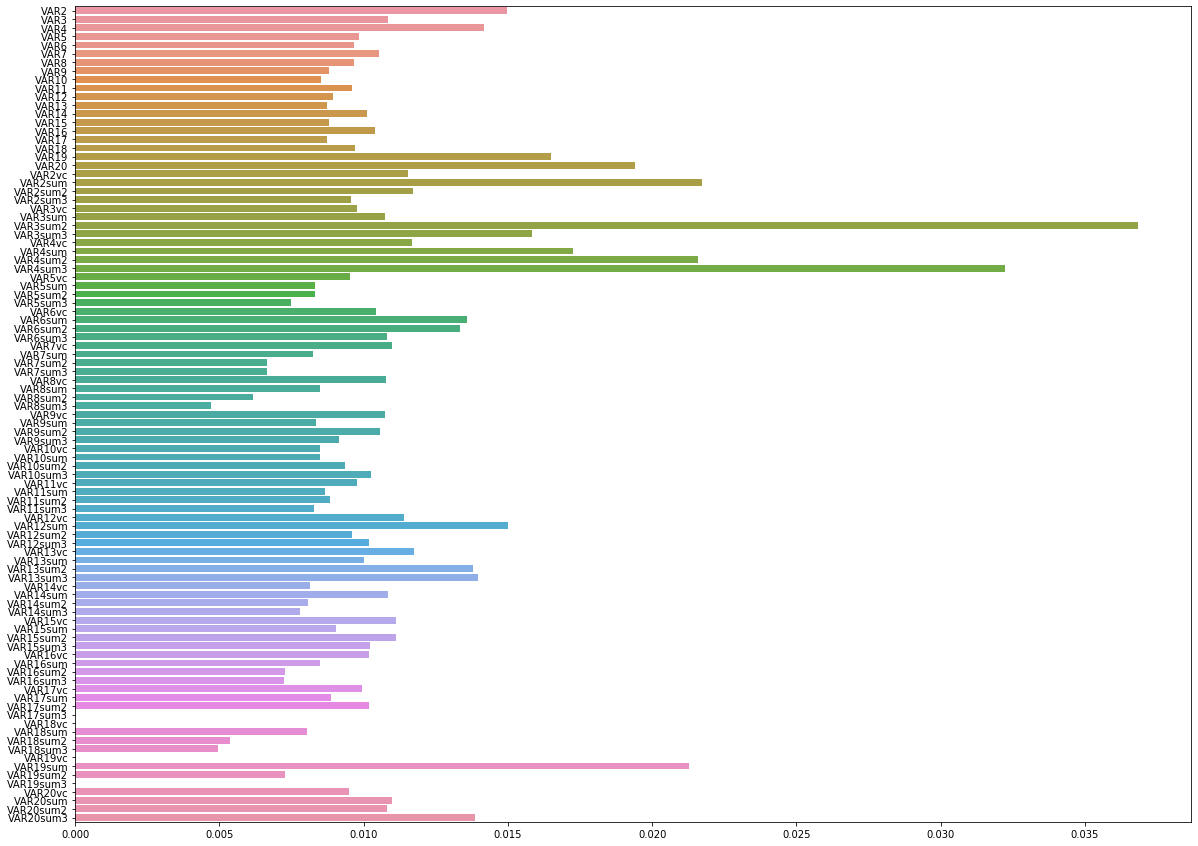

In [43]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.barplot(modelxgb.feature_importances_, train_x.columns)